operators can be overloaded

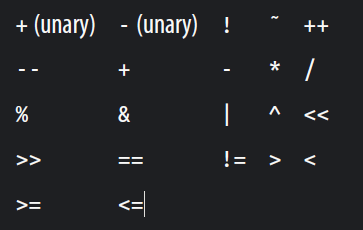

You can ***overload operators*** to provide `more natural syntax` for `custom types`.

### Operator Functions

You overload an operator by declaring an operator function. An operator function
has the following rules:  

- The name of the function is specified with the `operator` keyword followed by
an `operator symbol`.
- The operator function must be marked `static` and public.
- The parameters of the operator function represent the `operands`.
- The return type of an operator function represents the `result` of an expression.
- At least one of the operands must be the type in which the operator function is
declared.

In [2]:
public struct Note
{
    int value;
    public Note (int semitonesFromA) { value = semitonesFromA; }
    public static Note operator + (Note x, int semitones)
    {
        return new Note (x.value + semitones);
    }
}

var note=new Note(12);

var newNote = note + 5;

/*Overloading an operator automatically overloads the corresponding compound
assignment operator.*/

newNote +=2;

12
17


### Overloading Equality and Comparison Operators

In [ ]:
using System;

public class Person : IComparable<Person>
{
    public string Name { get; }
    public int Age { get; }

    public Person(string name, int age)
    {
        Name = name;
        Age = age;
    }

    // Overloading the == operator
    public static bool operator ==(Person p1, Person p2)
    {
        if (ReferenceEquals(p1, null) && ReferenceEquals(p2, null))
            return true;
        if (ReferenceEquals(p1, null) || ReferenceEquals(p2, null))
            return false;

        return p1.Name == p2.Name && p1.Age == p2.Age;
    }

    // Overloading the != operator
    public static bool operator !=(Person p1, Person p2)
    {
        return !(p1 == p2);
    }

    // Overloading the > operator
    public static bool operator >(Person p1, Person p2)
    {
        if (ReferenceEquals(p1, null) || ReferenceEquals(p2, null))
            throw new ArgumentNullException("Comparison to null is not supported.");

        return p1.Age > p2.Age;
    }

    // Overloading the < operator
    public static bool operator <(Person p1, Person p2)
    {
        if (ReferenceEquals(p1, null) || ReferenceEquals(p2, null))
            throw new ArgumentNullException("Comparison to null is not supported.");

        return p1.Age < p2.Age;
    }

    // Overloading the >= operator
    public static bool operator >=(Person p1, Person p2)
    {
        return !(p1 < p2);
    }

    // Overloading the <= operator
    public static bool operator <=(Person p1, Person p2)
    {
        return !(p1 > p2);
    }

    // Implementing IComparable<Person>
    public int CompareTo(Person other)
    {
        if (ReferenceEquals(other, null))
            return 1;

        return this.Age.CompareTo(other.Age);
    }

    // Overriding Equals method
    public override bool Equals(object obj)
    {
        if (ReferenceEquals(this, obj))
            return true;

        if (ReferenceEquals(obj, null) || this.GetType() != obj.GetType())
            return false;

        Person other = (Person)obj;
        return this.Name == other.Name && this.Age == other.Age;
    }

    // Overriding GetHashCode method
    public override int GetHashCode()
    {
        return HashCode.Combine(Name, Age);
    }
}

Person person1 = new Person("Alice", 30);
Person person2 = new Person("Bob", 25);
Person person3 = new Person("Alice", 30);

// Using equality operators
Console.WriteLine(person1 == person2); // False
Console.WriteLine(person1 == person3); // True
Console.WriteLine(person1 != person2); // True

// Using comparison operators
Console.WriteLine(person1 > person2);  // True
Console.WriteLine(person1 < person2);  // False
Console.WriteLine(person1 >= person3); // True
Console.WriteLine(person1 <= person3); // True


### Custom Implicit and Explicit Conversions

In [3]:
public struct Complex
{
    public double Real { get; }
    public double Imaginary { get; }

    public Complex(double real, double imaginary)
    {
        Real = real;
        Imaginary = imaginary;
    }

    // Implicit conversion from double to Complex
    public static implicit operator Complex(double value)
    {
        return new Complex(value, 0);
    }

    // Explicit conversion from Complex to double
    public static explicit operator double(Complex value)
    {
        return value.Real;
    }
}

Complex x = 5d; // implicit
Console.WriteLine(x.Real);

double d = (double)x; //explicit
Console.WriteLine(d);


5
5


### Overloading true and false

In [1]:
public struct Complex
{
    public double Real { get; }
    public double Imaginary { get; }

    public Complex(double real, double imaginary)
    {
        Real = real;
        Imaginary = imaginary;
    }

    public static bool operator true(Complex value)
    {
        return value.Imaginary == 0;
    }

    public static bool operator false(Complex value)
    {
        return value.Imaginary != 0;
    }
}

var x = new Complex(1,0);
if(x)
    Console.WriteLine(x.Imaginary);

0
